### 导入csv数据

In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'titanic-data.csv'
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 了解数据
根据导入数据分析,本数据有12个变量,891个样本,变量有
变量及说明和值的类型:

survival	生还与否   0 = No, 1 = Yes  
pclass	   客舱等级   1 = 1st, 2 = 2nd, 3 = 3rd 代表经济地位,1st = Upper,2nd = Middle,3rd = Lower  
sex	Sex	   性别      male,female  
Age	      年龄      如果年龄小于1岁的用分数表示  
sibsp	   亲属数目包括兄弟姐妹和夫妻关系  
parch	   直系亲属数目包括父母  
ticket	   票编号  
fare	   旅客票价  
cabin	   船舱号  
embarked	上船地点  

### 整理数据
存在数据缺失的有,年龄,舱号,上船地点,  
年龄缺失有891-714=177,用求平均数加减标准差乘以随机数来生成,  
舱号缺失太多而且主观上认为和生存与否关系不是特别明显所以不使用这个参数,  
上船地点缺失不多,以最多的上船地址S来填充  
票号意义不大去掉  

In [20]:
mean_age = df["Age"].mean()
std_age = df["Age"].std()
count_nan_age = df["Age"].isnull().sum()

rand_1 = np.random.randint(mean_age - std_age, mean_age + std_age, size = count_nan_age)
df["Age"][np.isnan(df["Age"])] = rand_1

df = df.drop("Cabin",axis=1)

df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values

df = df.drop("Ticket",axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### 探索数据
提出问题有哪些因素和生存有关系


In [21]:
#生存与是否有家人同伴的关系
df['Is_family']=df['SibSp']+df['Parch']
def num_1(x):
    if x>0:
        return 1
    else:
        return 0
df['Is_family'] = df['Is_family'].apply(num_1)
f_df=df[['Is_family','Survived']]
f_df.groupby(['Is_family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Is_family,Survived
1,1,0.505650
0,0,0.303538


In [22]:
# 单一分析:
# 生存与客舱等级的关系
p_df=df[['Pclass','Survived']]
p_df.groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
# 生存与性别的关系
s_df=df[["Sex", "Survived"]]
s_df.groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
# 生存与上船地点的关系
e_df=df[["Embarked","Survived"]]
e_df.groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


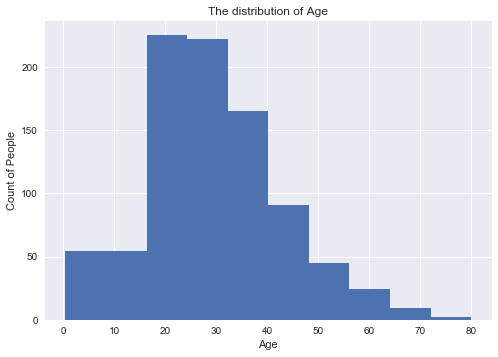

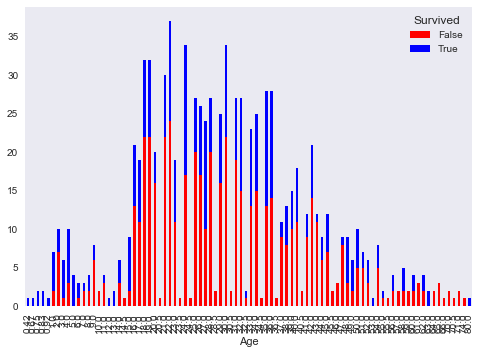

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
79,63.00,1.000000
68,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
87,80.00,1.000000
3,0.83,1.000000
4,0.92,1.000000


In [34]:
# 生存与年龄的关系
# 由于不是离散数据应此用图像显示
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['Age'],bins=10)
plt.title('The distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of People')
temp=pd.crosstab([df.Age],df.Survived.astype(bool))
temp.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()
a_df=df[['Age','Survived']]
a_df.groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

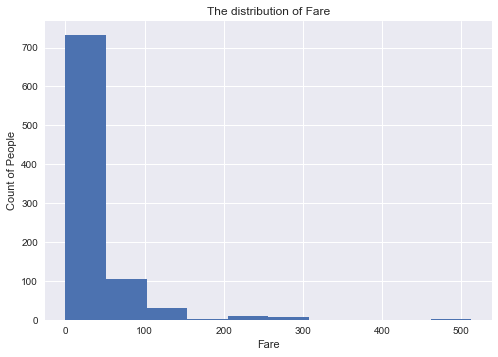

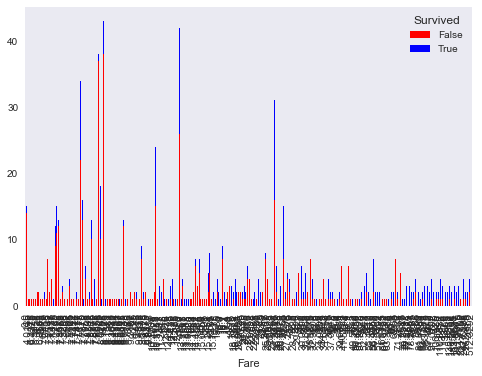

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
83,12.6500,1.0
81,12.4750,1.0
79,12.2875,1.0
194,56.9292,1.0
77,12.0000,1.0


In [35]:
# 生存与票价费用的关系
# 由于不是离散数据应此用图像显示
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(df['Fare'],bins=10)
plt.title('The distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count of People')
temp=pd.crosstab([df.Fare],df.Survived.astype(bool))
temp.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()
f_df=df[['Fare','Survived']]
f_df.groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

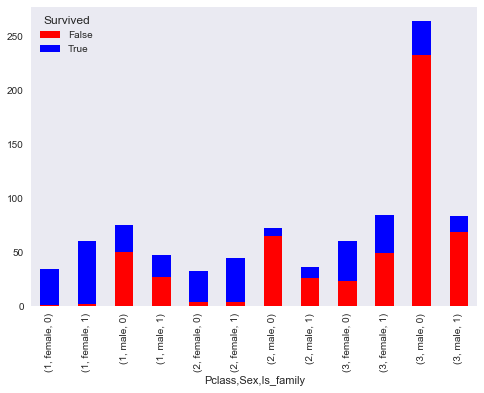

In [27]:
# 性别,船舱等级,是否有家庭与生存与否做比对
temp=pd.crosstab([df.Pclass,df.Sex,df.Is_family],df.Survived.astype(bool))
temp.plot(kind='bar',stacked=True,color=['red','blue'],grid=False)
plt.show()

### 结论
根据离散值统计再结合个因素单独比对生存结果生存几率最大的是的女性坐一等舱并有家庭成员陪伴并在Cherbourg上船的人,在年龄方面没有发现明显的偏向,费用方面,费用高者生还概率大